In [1]:
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris["data"][:, (2, 3)]  # petal length, width
y = iris['target']

In [8]:
X_bias = np.c_[np.ones([len(X), 1]), X]

In [9]:
np.random.seed(7)

In [11]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [29]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [30]:
y_train[:3]

array([2, 1, 0])

In [31]:
to_one_hot(y_train[:3])

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [32]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [33]:
def softmax(logits):
    exp = np.exp(logits)
    exp_sum = np.sum(exp, axis=1, keepdims=True)
    return exp / exp_sum

In [35]:
n_inputs = X_train.shape[1] # = 3, +1 for the bias term
n_outputs = len(np.unique(y_train)) # 3, number of classes

In [38]:
eta = 0.01
n_iterations = 5000
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis = 1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = (1 / m) * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 3.390953069496908
500 1.0483300237107267
1000 0.8141152154252149
1500 0.6780390859931054
2000 0.5951426686176301
2500 0.5399041545789285
3000 0.5000752078868554
3500 0.4696081955632149
4000 0.44527662832908355
4500 0.42521666263701136


In [39]:
Theta

array([[ 4.19700011,  0.73888171, -1.86276295],
       [-1.27467405, -0.28144332, -0.12241629],
       [-1.43685043, -0.24792493,  1.00756974]])

In [40]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

### Plot predictions on whole dataset

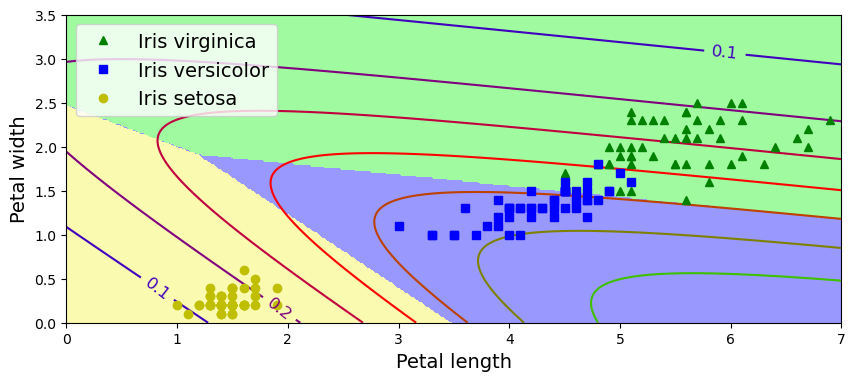

In [42]:
import matplotlib.pyplot as plt

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

### Final Accuracy

In [43]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333